# LumberNet Classifier Demo

In [20]:
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import json
from PIL import Image
from os.path import join


## List test images

In [21]:
images_dir = 'images'
test_images = ['st1035_sound_knot_57.PNG', 
               'st1035_split_103.PNG', 
               'st1035_dry_knot_6.PNG', 
               'st1035_sound_10.PNG', 
               'st1035_sound_5.PNG',
               'st1035_sound_11.PNG']

## Load and display test images

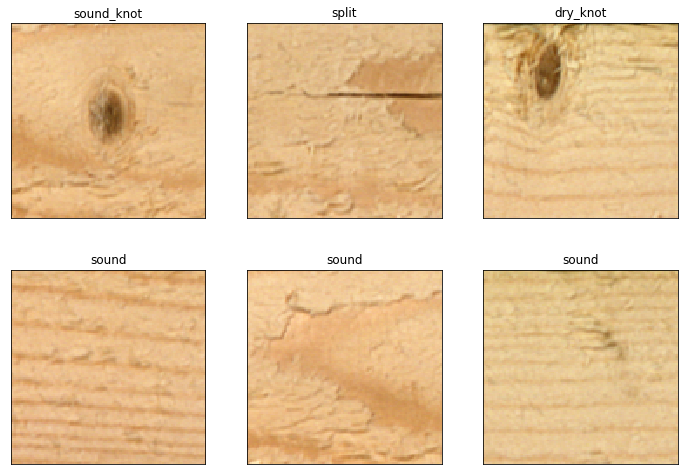

In [22]:
def load_images(images_dir, image_names):
   
    images = []
    labels = []
    for image_name in image_names:
        image = Image.open(join(images_dir, image_name))
        label = image_name[image_name.find('_')+1 : image_name.rfind('_')]
        images.append(np.array(image))
        labels.append(label)
                      
    return images, labels


images, labels = load_images(images_dir, test_images)
figsize=(10, 7)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image, label in zip(axis.flat[0:], images, labels):
    ax.set_title(label)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)



## Load a model and predict results

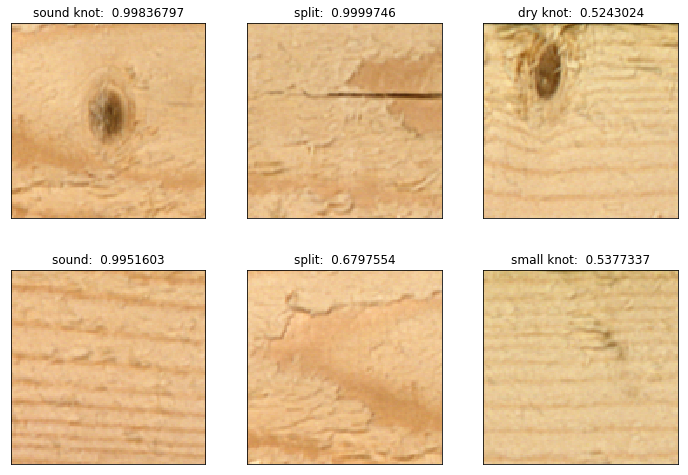

In [23]:
from tensorflow.python.keras.models import load_model

def classify_images(images, model_path):
    labels = ['sound', 'split', 'wane', 'sound knot', 'dry knot', 'core stripe', 'small knot']
    images = np.asarray(images)
    images = images/255
    
    model = load_model(model_path)
    predictions = model.predict(images)
    
    indexes = np.argmax(predictions, axis=1)
    probs = []
    results = []
    
   
    for i in range(predictions.shape[0]):
        results.append(labels[indexes[i]])
        probs.append(predictions[i][indexes[i]])
        
    return results, probs

labels, probs = classify_images(images, 'lumber1.h5')

figsize=(10, 7)
fig, axis = plt.subplots(len(images)//3, 3, figsize=figsize)
fig.tight_layout()
for ax, image, label, prob in zip(axis.flat[0:], images, labels, probs):
    ax.set_title(label + ':  ' + str(prob))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.imshow(image)